In [2]:
import pandas as pd
df= pd.read_csv('fish.csv', names=['AGE','TEMP','LENGTH'])
df

In [3]:
df.describe()

,AGE,TEMP,LENGTH
count,44.000000,44.000000,44.000000
mean,83.181818,28.000000,3107.431818
std,44.522935,2.261919,1328.962883
min,14.000000,25.000000,590.000000
25%,41.000000,26.500000,2135.000000
50%,83.000000,28.000000,3197.000000
75%,125.000000,29.500000,4500.000000
max,153.000000,31.000000,4600.000000


In [5]:
import pandas as pd
import plotly.express as px 
df= pd.read_csv('fish.csv', names=['AGE','TEMP','LENGTH'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AGE     44 non-null     int64
 1   TEMP    44 non-null     int64
 2   LENGTH  44 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


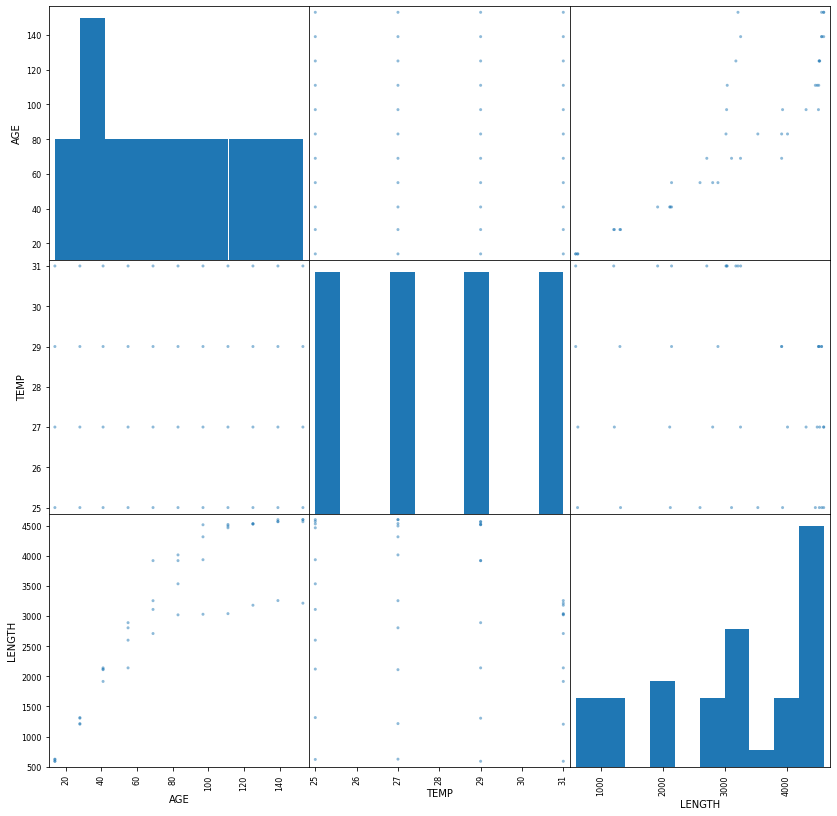

In [6]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 
plt.rcParams['figure.figsize'] = (14.0,14.0) 
# selecting three numerical features 
features = ['AGE', 'TEMP', 
            'LENGTH'] 
   
# plotting the scatter matrix 
# with the features 
scatter_matrix(df[features]) 
plt.show() 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns; sns.set()
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

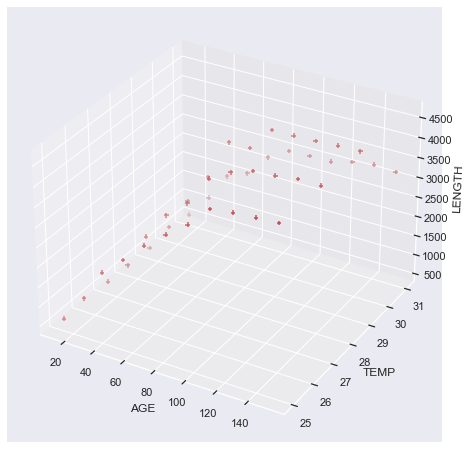

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm


model = sm.ols(formula='LENGTH ~ AGE + TEMP', data = df)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['AGE'], df['TEMP'], df['LENGTH'], c='r', marker='+')

xx, yy = np.meshgrid(df['AGE'], df['TEMP'])

# Not what I expected :(
# ax.plot_surface(xx, yy, fit.fittedvalues)

ax.set_xlabel('AGE')
ax.set_ylabel('TEMP')
ax.set_zlabel('LENGTH')

plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
df= pd.read_csv('fish.csv', names=['AGE','TEMP','LENGTH'])

regr = LinearRegression()
regr.fit(df[['AGE','TEMP']], df.LENGTH)
print(regr.coef_)
regr.intercept_

[  26.24068177 -106.41363636]


3904.266016751818

In [17]:
target= ['LENGTH'] 
predictors = list(set(list(df.columns))-set(target))
df[predictors] = df[predictors]/df[predictors].max()
X = df[predictors].values
y = df[target].values
# get rows from first column
X =df.iloc[:,:2]
# get columns from second column
#y = df.iloc[:,1:]
#X =df.iloc[:,:1]
# get columns from second column
y = df.iloc[:,1:]

regr = LinearRegression()
#regr = linear_model.LinearRegression()
regr.fit(X, y) 
predicted = regr.predict(y)
#print(predicted)

In [18]:
from sklearn.metrics import r2_score
from sklearn import metrics

mae = metrics.mean_absolute_error(y,X)
mse = metrics.mean_squared_error(y,X)
rsq = metrics.r2_score(y,X)

print('Mean Absollute Error:', mae)
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', rsq)

Mean Absollute Error: 1553.4562824641096
Mean Squared Error: 5688278.595008668
Coefficient of Determination: -23.17221204116594


## How Good is the Result